In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import time
import os
import copy

In [2]:
class SquarePad:
    def __call__(self, image):
        """
        Args:
            img (PIL Image): Image to be padded.

        Returns:
            PIL Image: Padded image.
            
        """
        w, h = image.size
        max_wh = np.max([w, h])
        hp = int((max_wh - w) / 2)
        vp = int((max_wh - h) / 2)
        padding = (hp, vp, hp, vp)
        return F.pad(image, padding, 0, 'constant')

target_image_size = (224, 224)  # as an example
# now use it as the replacement of transforms.Pad class
#Data Augmentation and normalization for training
# and only Normalization for validation
data_transforms = {
    'train': transforms.Compose([
        SquarePad(),
        transforms.Resize(target_image_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        SquarePad(),
        transforms.Resize(target_image_size),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [5]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [6]:
data_dir = '/content/drive/MyDrive/dataset'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True)
              for x in ['train', 'val']}

In [7]:
#Dataset sizes and classes names
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

#### Visulaize a few images

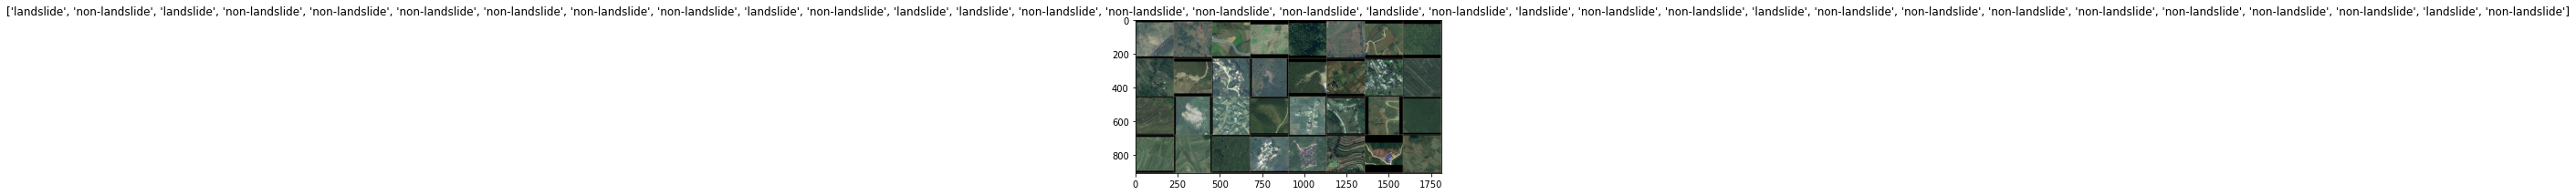

In [8]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [14]:
dataiter = iter(dataloaders['val'])
images, labels = dataiter.next()
print(torch.mean(images), torch.max(images))

tensor(-0.5606) tensor(2.6051)


### Define Model




In [ ]:
#Defining architecture.
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init_()
    #encoder layers
    self.encoder = nn.sequential(
        nn.Conv2d()
    )